### Toy example of Boosting Algorithm

#### With knowledge of how test labels look like

In [36]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from test_score import score

In [185]:
# Initialize
def initial(y,n_learners,sigma=3):
    """
    Initial weak predictors via true value + random noise with mean 0 and variance sigma^2
    """
    learners = []
    for n in range(n_learners):
        learner = true_values + abs(np.random.normal(0,3,size=(true_values.shape)))
        learners.append(np.array(learner).reshape(-1,1))
    return learners

In [228]:
# Choosing the best combination
def choose(y,l1,l2):
    """
    Choose the entries that are closer to true values from two vectors
    """
    d1 = np.abs(y-l1)
    d2 = np.abs(y-l2)
    
    ind1 = d1 <= d2
    new = (ind1 * l1 + ~ind1 * l2)
    
    return new

In [229]:
# boosting
def boosting(y,learners):
    
    # initial learner
    l0 = learners[0]
    del learners[0]
    
    # first combination
    p0 = choose(true_values,l0,learners[0])
    del learners[0]
    
    # Update
    for i in range(len(learners)):
        p1 = choose(true_values,p0,learners[i])
        p0 = p1
    
    
    return score(p0)

In [230]:
# Load data
true_values = pd.read_csv('true_values.csv',header=-1)
ture_values = np.array(true_values)

In [233]:
n_learners = [5,15,30,50,70,85,100]
scores = []
for n in n_learners:
    learners = initial(y=true_values, n_learners=n,sigma=3)
    s = boosting(true_values,learners=learners.copy())
    scores.append(s)

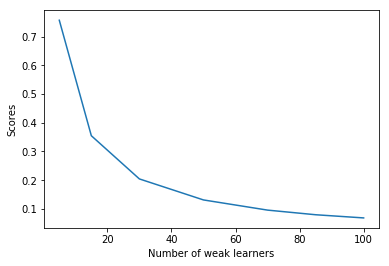

In [234]:
plt.plot(n_learners,scores)
plt.xlabel('Number of weak learners')
plt.ylabel('Scores')
plt.savefig('boosting.png')